### Wikipedia Edit Analysis


The dataset, sourced from Wikipedia XML Dumps, logs all edits on a specific Wikipedia from its inception to the end of a given year. Each entry captures the article title, timestamp, revert status, version, and editor. The repo does not contain data provided by the school, as sharing the data is not permitted.



### 1. Revert Activities

The goal is to build a network edge list linking the editor who restored an earlier article version to the editor who made the subsequent revision. For each edge, details recorded include the reverter, the reverted, the timestamp of the revert, and the "seniority" of both individuals at that time. Self-reverts are excluded from the dataset for analysis.




In [2]:
# Obtain revert network data 
# Print the first 5 data points (nodes or edges) in the network
import data_loading as dl
import data_analysis as da
wiki_data = dl.load_data("../data/rowiki_2006.txt")
reverts, editor_edits = da.identify_reverts(wiki_data)
network = da.construct_network(reverts)
    
# Print the first 5 data points
print("First 5 data points in the network:")
for edge in network[:5]:
    print(edge)

First 5 data points in the network:
{'reverter': 'TSO1D', 'reverter_seniority': 0.0, 'reverted': 'Zwobot', 'reverted_seniority': 0.3010299956639812, 'time': datetime.datetime(2006, 1, 25, 0, 12, 36)}
{'reverter': 'Iulianu', 'reverter_seniority': 0.3010299956639812, 'reverted': 'TSO1D', 'reverted_seniority': 0.3010299956639812, 'time': datetime.datetime(2006, 1, 25, 0, 15, 10)}
{'reverter': 'Thijs!bot', 'reverter_seniority': 0.3010299956639812, 'reverted': 'RobotQuistnix', 'reverted_seniority': 1.0413926851582251, 'time': datetime.datetime(2006, 8, 27, 0, 39, 41)}
{'reverter': 'Laurap', 'reverter_seniority': 0.6989700043360189, 'reverted': '86.55.176.66', 'reverted_seniority': 0.3010299956639812, 'time': datetime.datetime(2006, 5, 5, 7, 52, 54)}
{'reverter': 'Alex:D', 'reverter_seniority': 0.0, 'reverted': '165.228.132.11', 'reverted_seniority': 0.7781512503836436, 'time': datetime.datetime(2006, 11, 24, 16, 3, 13)}


### 2. Mutual revert actitivities

The task is to find AB-BA event sequences where editor A reverts editor B, and B reverts A back within 24 hours. Revert data is used without considering article titles, allowing responses across articles or with intervening reverts. Only the first response within 24 hours is included.

In [3]:
# Get AB-BA event sequences (reverts occur within 24 hours of each other)

print(f"Number of AB-BA event sequences: {len(da.find_ab_ba_sequences(reverts))}")
ab_ba_sequences = da.find_ab_ba_sequences(reverts)

Number of AB-BA event sequences: 206


### 3. Retaliation and Seniority Similarity in AB-BA Event Sequences

Editors involved in mutual reverts within 24 hours are hypothesized to have closer seniority than expected. To test this, the absolute seniority differences in AB-BA sequences are compared with those in other reverts using histograms and mean values.



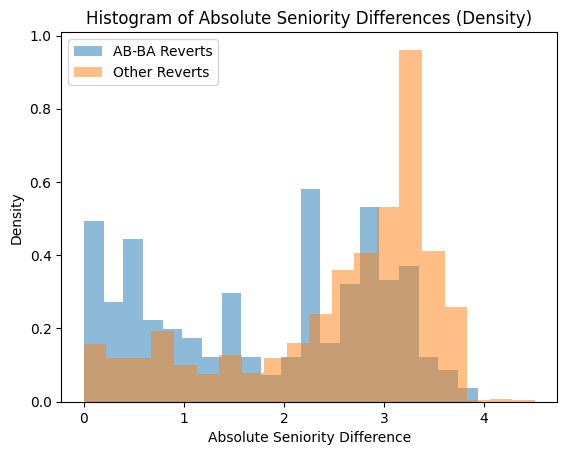

Mean absolute seniority difference in AB-BA sequences: 1.8081990807407742
Mean absolute seniority difference in other reverts: 2.5226508254972657


In [4]:
# Get absolute seniority difference for reverts in AB-BA sequences and the rest
# Print the mean abs. seniority diff. for reverts in AB-BA sequences and the rest
import visualization as viz

ab_ba_diffs = da.calculate_abs_seniority_differences_ab_ba(ab_ba_sequences, editor_edits)
other_reverts_diffs = da.calculate_abs_seniority_differences_other(reverts, ab_ba_sequences, editor_edits)

# Plot a histogram with the two distributions overlapping
viz.plot_histograms(ab_ba_diffs, other_reverts_diffs)

# Print the mean abs. seniority diff. for reverts in AB-BA sequences and the rest
print("Mean absolute seniority difference in AB-BA sequences:", viz.mean_difference(ab_ba_diffs))
print("Mean absolute seniority difference in other reverts:", viz.mean_difference(other_reverts_diffs))